In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path = "..//..//data//Churn_Modelling.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
### divide the data into independent and dependent features
df.shape

(10000, 14)

In [6]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
### Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [11]:
## concatenate these variables with dataframe
X = X.drop(['Geography','Gender'],axis=1) 

In [12]:
X = pd.concat([X,geography,gender], axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [14]:
## Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
## Now creating the model using ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [18]:
classifier = Sequential()

In [19]:
#adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [20]:
# Adding 1st Hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [21]:
# Adding 2nd Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [22]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [24]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
# Early Stopping
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [26]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=earlystopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7743 - loss: 0.4697 - val_accuracy: 0.8410 - val_loss: 0.3810
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8383 - loss: 0.3703 - val_accuracy: 0.8395 - val_loss: 0.3763
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 0.3567 - val_accuracy: 0.8360 - val_loss: 0.3709
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8612 - loss: 0.3468 - val_accuracy: 0.8485 - val_loss: 0.3673
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3468 - val_accuracy: 0.8417 - val_loss: 0.3698
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.3523 - val_accuracy: 0.8444 - val_loss: 0.3627
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.3502 - val_accuracy: 0.8493 - val_loss: 0.3636
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.3462 - 

In [27]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

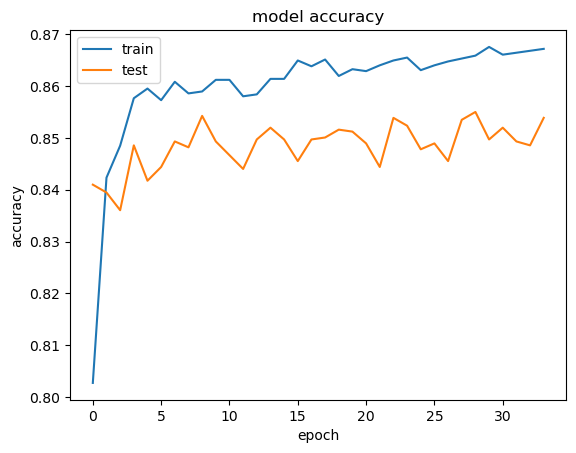

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

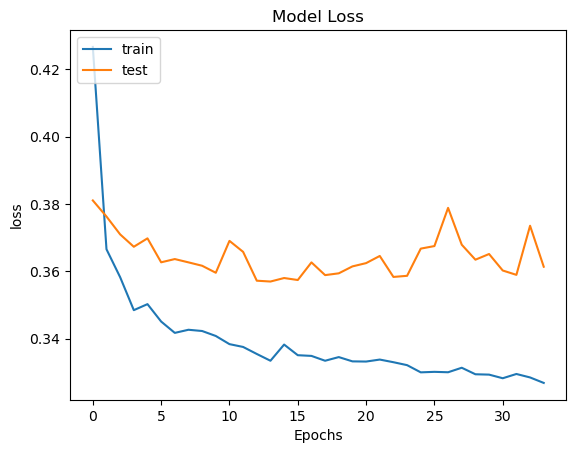

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(['train','test'],loc='upper left')
plt.show()


In [30]:
ypred = classifier.predict(X_test)
ypred = (ypred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [33]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
cm

array([[1526,   69],
       [ 206,  199]], dtype=int64)

In [34]:
## cal accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ypred, y_test)

0.8625

In [36]:
## get the weights
classifier.get_weights()

[array([[-0.06949136,  0.00529398,  0.00580101, -0.30473503,  0.5725103 ,
         -0.9323046 , -0.41404745,  0.46481392, -0.24916953,  0.273745  ,
          0.88133126],
        [ 0.46657187, -2.6261415 ,  0.08169468,  0.20110689,  1.6021725 ,
         -0.14618699,  0.0065469 , -3.2994423 ,  0.19703858,  1.6427739 ,
         -0.9487331 ],
        [ 0.42248198,  0.75537765,  0.536737  ,  0.6565706 ,  0.5132651 ,
          0.93532073, -0.05078269,  0.13898088, -0.23065412, -0.85741884,
          1.7054923 ],
        [ 0.8772874 , -0.14911842, -2.4260404 , -3.0381825 ,  0.3360845 ,
         -2.2021198 ,  0.05534093, -0.35291764, -0.6723829 ,  0.86341184,
          1.1649232 ],
        [ 2.7575989 ,  0.11929244,  1.6948102 , -2.6417036 , -0.16187221,
         -0.3973243 ,  2.8265216 ,  0.80800164, -2.416797  ,  0.2647734 ,
         -1.241962  ],
        [-0.23980486,  0.5285291 ,  0.17720948,  0.28369012,  0.48246926,
         -1.1956582 ,  0.39897624, -0.2603572 , -0.33359486, -0.7041423

In [37]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815 (3.19 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 544 (2.13 KB)